# Model Validation and Data Leakage

## Objectives

- explain the bias-variance tradeoff and the notions of underfit and overfit models
- describe a train-test split and explain its purpose in the context of predictive statistics / machine learning

Bonus: evaluate models using other regression metrics

## Motivation

At this point, we have seen different ways to create models from our data through different linear regression techniques. That's good. But when it comes to measuring model performance, we also want to make sure that our models are ready to predict _on data that they haven't seen yet_.

Usually, when our model is ready to be used in the "real world" we refer to this as putting our model into **production** or **deploying** our model. The data points for which it will make predictions will be data *it has never seen before*, as opposed to the data points that were used to train the model.

This is where ***model validation*** techniques come in, namely, to ensure our model can *generalize* to data it hasn't directly seen before.

As a way into a discussion of these techniques let's say a word about the **bias-variance tradeoff**.

## The Bias-Variance Tradeoff

We can break up how the model makes mistakes (the error) by saying there are three parts:

- Error inherent in the data (noise): **irreducible error**
- Error from not capturing signal (too simple): **bias**
- Error from "modeling noise", i.e. capturing patterns in the data that don't generalize well (too complex): **variance**

We can summarize this in an equation for the _mean squared error_ (MSE):

$MSE = Bias(\hat{y})^2 + Var(\hat{y}) + \sigma^2$

<img src="images/optimal_bias_variance.png" alt="image source: http://scott.fortmann-roe.com/docs/BiasVariance.html" width=600>

### Bias

**High-bias** algorithms tend to be less complex, with simple or rigid underlying structure.

<img src="images/noisy-sine-linear.png" width=400>

+ They train models that are consistent, but inaccurate on average.
+ These include linear or parametric algorithms such as regression and naive Bayes.
+ The following sorts of difficulties could lead to high bias:
  - We did not include the correct predictors
  - We did not take interactions into account
  - We missed a non-linear (polynomial) relationship

      
High-bias models are generally **underfit**: The models have not picked up enough of the signal in the data. And so even though they may be consistent, they don't perform particularly well on the initial data, and so they will be consistently inaccurate.

### Variance

On the other hand, **high-variance** algorithms tend to be more complex, with flexible underlying structure.

<img src="images/noisy-sine-decision-tree.png" width=400>

+ They train models that are accurate on average, but inconsistent.
+ These include non-linear or non-parametric algorithms such as decision trees and nearest-neighbor models.
+ The following sorts of difficulties could lead to high variance:
  - We included an unreasonably large number of predictors;
  - We created new features by squaring and cubing each feature.

High variance models are **overfit**: The models have picked up on the noise as well as the signal in the data. And so even though they may perform well on the initial data, they will be inconsistently accurate on new data.

### Balancing Bias and Variance

While we build our models, we have to keep this relationship in mind.  If we build overly complex models, we risk overfitting our models.  Their predictions will vary greatly when introduced to new data.  If our models are too simple, the predictions as a whole will be inaccurate.   

<img src="images/noisy-sine-third-order-polynomial.png" width=450>

The goal is to build a model with enough complexity to be accurate, but not too much complexity to be erratic.

## How To Minimize Bias and Variance

### Combat Underfitting (Bias)

**Bias**: Error introduced by approximating a real-life problem (which may be extremely complicated) by a much simpler model (because the model is too simple to capture the underlying pattern)

**The Solution:** evaluate the performance of our models, using a scoring metric, which will help us catch if a model is underfit - if it's performing quite poorly, it probably isn't capturing the relationship in our data! 

### Combat Overfitting (Variance)

**Variance**: Amount by which our model would change if we estimated it using a different training dataset (because the model is over-learning from the training data)

**The Solution:** don't train your model on ALL of your data, but keep some of it in reserve to test on, in order to simulate how it will work on new/incoming data.


<img alt="original image from https://www.dataquest.io/wp-content/uploads/kaggle_train_test_split.svg plus some added commentary" src="images/traintestsplit_80-20.png" width=650, height=150>  

How does this fight against overfitting? By witholding data from the training process, we are testing whether the model actually _generalizes_ well. If it does poorly on the test set, it's a good sign that our model learned too much noise from the train set and is overfit! 

![arrested development gif, found by Andy](https://heavy.com/wp-content/uploads/2013/05/tumblr_mjm9fqhrle1rvnnvyo6_250.gif)

### Time to Train Test Split!

Let's practice with credit data from https://www.kaggle.com/avikpaul4u/credit-card-balance

Target: `Balance`

In [1]:
# Basic imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
# Data
df = pd.read_csv('data/Credit.csv', 
                 usecols=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Balance'])

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Balance
0,14.891,3606,283,2,34,333
1,106.025,6645,483,3,82,903
2,104.593,7075,514,4,71,580
3,148.924,9504,681,3,36,964
4,55.882,4897,357,2,68,331


In [4]:
df.describe()

,Income,Limit,Rating,Cards,Age,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,1999.000000


You should split your data into training and testing data _early_ in the process - ideally even before you've done a lot of data exploration! 

**FOR THE PROJECT, YOU WILL BE _REQUIRED_ TO WORK WITH A TRAIN TEST SPLIT**

Note - for checkpoints and the code challenge, follow the instructions given - they might not require a train/test split as they attempt to keep thing simple.

BUT we're going to use it in this session! Let's see what this looks like in practice!

[Documentation for the train-test split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
# Importing the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

In [6]:
# Need to define our X and y
X = df.drop(columns='Balance')
y = df['Balance']

In [7]:
# Train test split here!
# Set test_size = .33
# Set random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

What did that do?

In [8]:
X_train.shape

(268, 5)

In [9]:
X_test.shape

(132, 5)

In [10]:
len(X_train + X_test) == len(X)

True

In [11]:
X_train.head()

,Income,Limit,Rating,Cards,Age
258,41.400,2561,215,2,36
177,22.379,3965,292,2,34
119,23.012,1410,137,3,81
194,30.406,2120,181,2,79
229,69.943,7555,547,3,76


In [12]:
y_train.head()

258       0
177     384
119       0
194       0
229    1058
Name: Balance, dtype: int64

In [13]:
X_train.index == y_train.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### Time to Model!

Pick your poison: would you like to start with the kitchen sink approach, or choose one variable to model against `Balance`?

In [15]:
# If simple model - would want to see what correlates with target
train_df = X_train.copy()

train_df['target'] = y_train

<AxesSubplot:>

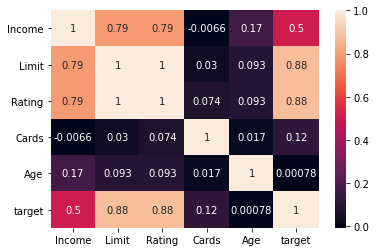

In [16]:
sns.heatmap(train_df.corr(), annot=True)

In [17]:
train_df.corr()['target'].sort_values(ascending=False)

target    1.000000
Rating    0.880719
Limit     0.880302
Income    0.501414
Cards     0.120045
Age       0.000781
Name: target, dtype: float64

In [20]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['Rating'])).fit()

In [21]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     919.7
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           2.59e-88
Time:                        13:54:35   Log-Likelihood:                -1830.3
No. Observations:                 268   AIC:                             3665.
Df Residuals:                     266   BIC:                             3672.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -399.0605     33.857    -11.787      0.000    -465.723    -332.398
Rating         2.6205      0.086     30.327      0.000       2.450       2.791
==============================================================================
Omnibus:                       17.496   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.301
Skew:                           0.333   Prob(JB):                     3.56e-08
Kurtosis:                       4.621   Cond. No.                         967.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# If kitchen sink - should scale first!
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Now model and check the summary
sink_model = sm.OLS(y_train, sm.add_constant(X_train_scaled)).fit()
sink_model.summary(xname=['Y-Intercept', *X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     410.8
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          9.85e-122
Time:                        14:03:50   Log-Likelihood:                -1738.6
No. Observations:                 268   AIC:                             3489.
Df Residuals:                     262   BIC:                             3511.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Y-Intercept   539.6343      9.817     54.967      0.000     520.303     558.965
Income       -245.3279     16.442    -14.921      0.000    -277.703    -212.953
Limit         475.8959    147.989      3.216      0.001     184.498     767.294
Rating        135.5443    149.144      0.909      0.364    -158.129     429.218
Cards          31.1953     11.889      2.624      0.009       7.785      54.605
Age           -15.3400      9.989     -1.536      0.126     -35.008       4.328
==============================================================================
Omnibus:                       62.981   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.460
Skew:                           1.330   Prob(JB):                     2.07e-23
Kurtosis:                       4.509   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Evaluate:

How'd we do?

- 


But, more importantly, how can we see how we did on the test data?

In [28]:
# Let's use sklearn's r2_score to score our model
from sklearn.metrics import r2_score

In [36]:
# Need to grab out model predictions
# Don't forget to add the constant
# ALSO! If we followed the kitchen sink approach, need to transform X_test!
train_preds = simple_model.predict(sm.add_constant(X_train['Rating']))
test_preds = simple_model.predict(sm.add_constant(X_test['Rating']))

In [37]:
print(f"Simple Model Train R2: {r2_score(y_train, train_preds)}")
print(f"Simple Model Test R2: {r2_score(y_test, test_preds)}")

Simple Model Train R2: 0.7756660731253149
Simple Model Test R2: 0.6656804809053132


In [38]:
train_preds = sink_model.predict(sm.add_constant(X_train_scaled))
test_preds = sink_model.predict(sm.add_constant(X_test_scaled))

In [39]:
print(f"Simple Model Train R2: {r2_score(y_train, train_preds)}")
print(f"Simple Model Test R2: {r2_score(y_test, test_preds)}")

Simple Model Train R2: 0.886882050887701
Simple Model Test R2: 0.8500179616615862


#### Evaluate

How'd we do? What do you observe?

- 


## 🧠 Knowledge Check

<img src="images/which_model_is_better_2.png" width=700>

## Process Recap

If our model is not performing well on the training data, we are probably underfitting it.  

To know if our  model is overfitting the data, we need  to test our model on unseen data. We then measure our performance on the unseen data. 

If the model performs significantly worse on the unseen data, it is probably overfitting the data.

<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg' width=500/>

## Should You Ever Fit on Your Test Set?  

![no](https://media.giphy.com/media/d10dMmzqCYqQ0/giphy.gif)

**Never fit on test data.** If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set.

This goes both for models and for preprocessing steps, like scalers!

## Practice Exercises: Name that Model!

Consider the following scenarios and describe them according to bias and variance. There are four possibilities:

- a. The model has low bias and high variance.
- b. The model has high bias and low variance.
- c. The model has both low bias and low variance.
- d. The model has both high bias and high variance.

**Scenario 1**: The model has a low $R^2$ on training and a low $R^2$ on test.

- 


**Scenario 2**: The model has a high $R^2$ on the training set, but a low $R^2$ on the test.

- 


**Scenario 3**: The model performs well on data it is fit on and well on data it has not seen.

- 


**Scenario 4**: The model has a low $R^2$ on training but high on the test set.

- 


**Scenario 5**: The model leaves out many of the meaningful predictors, but is consistent across samples.

- 


**Scenario 6**: The model is highly sensitive to random noise in the training set.

- 


## Extra Credit: Beyond the $R^2$ Score

There are other metrics! 

#### Mean Absolute Error (MAE)

$$\text{MAE}(y, y_\text{pred}) = \frac{1}{n} \sum_{i=0}^{n} \left| y_i - y_\text{pred}i \right|$$

- Measures the average magnitude of errors regardless of direction, by calculating the total absolute value of errors and dividing by the number of samples (number of predictions made)
- **This error term is in the same units as the target!**

#### Mean Squared Error (MSE)

$$\text{MSE}(y, y_\text{pred}) = \frac{1}{n} \sum_{i=0}^{n} (y_i - y_\text{pred}i)^2$$

- Measures the average squared error, by calculating the sum of squared errors for all predictions then dividing by the number of samples (number of predictions)
- In other words - this is the Residual Sum of Squares (RSS) divided by the number of predictions!
- This error term is **NOT** in the same units as the target!

#### Root Mean Squared Error (RMSE)

$$\text{RMSE}(y, y_\text{pred}) = \sqrt{\frac{1}{n} \sum_{i=0}^{n} (y_i - y_\text{pred}i)^2}$$

- Measures the square root of the average squared error, by calculating the sum of squared errors for all predictions then dividing by the number of samples (number of predictions), then taking the square root of all that
- **This error term is in the same units as the target!**

Note - before, we were _maximizing_ R2 (best fit = largest R2 score). But we'd want to minimize these other error metrics.

Documentation: 
- [Regression Metrics in sklearn](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)
- [User Guide for Regression Metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
# Assuming we have a train_preds variable that captures our train predictions!

print("Metrics:")
# R2
print(f"R2: {r2_score(y_train, train_preds):.3f}")
# MAE
print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds):.3f}")
# MSE
print(f"Mean Squared Error: {mean_squared_error(y_train, train_preds):.3f}")
# RMSE - just MSE but set squared=False
print(f"Root Mean Squared Error: {mean_squared_error(y_train, train_preds, squared=False):.3f}")

Metrics:
R2: 0.887
Mean Absolute Error: 118.442
Mean Squared Error: 25251.723
Root Mean Squared Error: 158.908


Note that I said that MAE and RMSE are both in the same units as our target, but you'll see that they are different here. What's the difference?

> "Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable."

-- Source: ["MAE and RMSE — Which Metric is Better?"](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d)

How can we interpret these?

- R2: "Our model accounts for 61.2% of the variance in our target"
- MAE/RMSE: "Our model's predictions are, on average, about __ off from our actual target values" (here, balance is likely in dollars - so $___ off)

## Additional Resources:

- [Excellent statistical writeup about how to interpret Linear Regression coefficients, and their p-values](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/)
- [Great bias/variance infographic](https://elitedatascience.com/bias-variance-tradeoff) from Elite Data Science

-----

## Level Up: $k$-Fold Cross-Validation: Even More Rigorous Validation  

Our goal of using a test set is to simulate what happens when our model attempts predictions on data it's never seen before. But it's possible that our model would *by chance* perform well on the test set.

This is where we could use a more rigorous validation method and turn to **$k$-fold cross-validation**.

<img src="images/k_folds.png" width=600>

[image via sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)

In this process, we split the dataset into a train set and holdout test sets like usual by performing a shuffling train-test split on the train set.  

We then do $k$-number of _folds_ of the training data. This means we divide the training set into different sections or folds. We then take turns on using each fold as a **validation set** (or **dev set**) and train on the larger fraction. Then we calculate a validation score from the validation set the model has never seen. We repeat this process until each fold has served as a validation set.

This process allows us to try out training our model and check to see if it is likely to overfit or underfit without touching the holdout test data set.

If we think the model is looking good according to our cross-validation using the training data, we retrain the model using all of the training data. Then we can do one final evaluation using the test data. 

It's important that we hold onto our test data until the end and refrain from making adjustments to the model based on the test results.

## Level Up: More on Bias and Variance

### A Model Example

Typically we'll talk about a model in terms of how _complex_ it is in making predictions.

Let's take a look at this data with just one feature and a target:


We can probably picture how a good model will fit to this data. Let's look at a couple models and discuss how they're making mistakes.

#### Model A

![](images/model_simple.png)

What do we observe here? How would you describe where the model is failing?

- 


#### Model B

![](images/model_complex.png)

What do we observe here? How would you describe where the model is failing?

- 
